In [62]:
import numpy as np
import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats as scipy_stats
import seaborn as sns

In [28]:
help(sm)

Help on module statsmodels.api in statsmodels:

NAME
    statsmodels.api - # -*- coding: utf-8 -*-

CLASSES
    builtins.object
        statsmodels.duration.survfunc.SurvfuncRight
        statsmodels.graphics.gofplots.ProbPlot
        statsmodels.imputation.bayes_mi.BayesGaussMI
        statsmodels.imputation.bayes_mi.MI
        statsmodels.imputation.mice.MICE
        statsmodels.imputation.mice.MICEData
        statsmodels.multivariate.pca.PCA
    statsmodels.base._penalized.PenalizedMixin(builtins.object)
        statsmodels.gam.generalized_additive_model.GLMGam(statsmodels.base._penalized.PenalizedMixin, statsmodels.genmod.generalized_linear_model.GLM)
    statsmodels.base.model.LikelihoodModel(statsmodels.base.model.Model)
        statsmodels.duration.hazard_regression.PHReg
        statsmodels.genmod.generalized_linear_model.GLM
            statsmodels.gam.generalized_additive_model.GLMGam(statsmodels.base._penalized.PenalizedMixin, statsmodels.genmod.generalized_linear_model.GLM

In [4]:
atero = pd.read_csv('./data/atherosclerosis.csv')
atero.head(30)

,expr,age,dose
0,107.351478,1,D1
1,104.504438,1,D1
2,103.435134,1,D1
3,109.572882,1,D1
4,114.993803,1,D1
5,106.060605,1,D1
6,114.593613,1,D1
7,103.445769,1,D1
8,102.818702,1,D1
9,105.053772,1,D1


In [18]:
groups = {group: list(frame) for group, frame in atero.groupby(['age', 'dose']).expr}

In [25]:
for group in groups:
    print(group, np.std(groups[group], ddof=1))

(1, 'D1') 5.863453521054204
(1, 'D2') 4.369024138263363
(2, 'D1') 5.116310343506721
(2, 'D2') 5.1353744681594735


In [5]:
data = atero.copy()
model = ols('expr ~ dose*age', data).fit()
res = sm.stats.anova_lm(model, typ=2)
res

,sum_sq,df,F,PR(>F)
dose,16.912241,1.0,0.638094,0.427552
age,197.452754,1.0,7.449841,0.008313
dose:age,0.927077,1.0,0.034978,0.852272
Residual,1590.257424,60.0,NaN,NaN


In [20]:
(data.age == 1) & (data.dose == 'D1')

0      True
1      True
2      True
3      True
4      True
      ...  
59    False
60    False
61    False
62    False
63    False
Length: 64, dtype: bool

In [24]:
[(i, j) for i in data.age.unique() 
        for j in data.dose.unique()]

[(1, 'D1'), (1, 'D2'), (2, 'D1'), (2, 'D2')]

In [57]:
data[data.age == 1].expr.std()/np.sqrt(data[data.age == 1].expr.count())

0.9019394870904884

<ErrorbarContainer object of 3 artists>

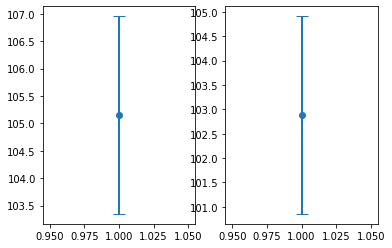

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.errorbar(1, data[data.age == 1].expr.mean(), 2*data[data.age == 1].expr.std()/
            np.sqrt(data[data.age == 1].expr.count()), fmt='o', linewidth=2, capsize=6)
ax2.errorbar(1, data[data.dose == 'D1'].expr.mean(), 2*data[data.dose == 'D1'].expr.std()/
            np.sqrt(data[data.dose == 'D1'].expr.count()), fmt='o', linewidth=2, capsize=6)

<AxesSubplot:xlabel='age', ylabel='expr'>

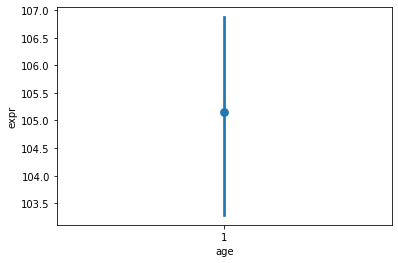

In [70]:
sns.pointplot(x=data[data.age == 1].age, y=data[data.age == 1].expr, data=data)

<AxesSubplot:xlabel='dose', ylabel='expr'>

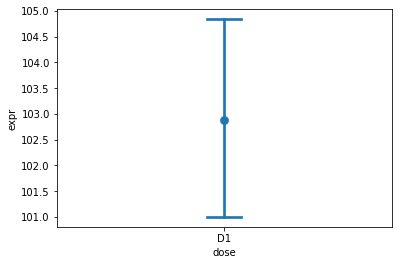

In [73]:
sns.pointplot(x=data[data.dose == 'D1'].dose, y=data[data.dose == 'D1'].expr, data=data, capsize=0.1)

In [37]:
N =  len(data.expr)
m1 = len(data.age.unique())
m2 = len(data.dose.unique())
df_a = m1 - 1
df_b = m2 - 1
df_axb = df_a*df_b 
df_w = N - m1*m2
#Общее среднее
grand_mean = data['expr'].mean()
#Суммы квадратов
ssq_a = sum([(data[data.age ==i].expr.mean()-grand_mean)**2 for i in data.age])
ssq_b = sum([(data[data.dose ==i].expr.mean()-grand_mean)**2 for i in data.dose])
ssq_t = sum((data.expr - grand_mean)**2)
spl_age=[data[data.age == i] for i in data.age.unique()]
age_means=[[x_age[x_age.dose == d].expr.mean() for d in x_age.dose] for x_age in spl_age]
ssq_w = sum([sum((spl_age[i].expr-age_means[i])**2) for i in range(len(data.age.unique()))])

ssq_axb = ssq_t-ssq_a-ssq_b-ssq_w
#Средние квадраты
ms_a = ssq_a/df_a
ms_b = ssq_b/df_b
ms_axb = ssq_axb/df_axb
ms_w = ssq_w/df_w
#F-значения
f_a = ms_a/ms_w
f_b = ms_b/ms_w
f_axb = ms_axb/ms_w
#P-значения
p_a = scipy_stats.f.sf(f_a, df_a, df_w)
p_b = scipy_stats.f.sf(f_b, df_b, df_w)
p_axb = scipy_stats.f.sf(f_axb, df_axb, df_w)
#результаты
results = {'sum_sq':[ssq_a, ssq_b, ssq_axb, ssq_w],
           'df':[df_a, df_b, df_axb, df_w],
           'F':[f_a, f_b, f_axb, 'NaN'],
            'PR(>F)':[p_a, p_b, p_axb, 'NaN']}
columns=['sum_sq', 'df', 'F', 'PR(>F)']
aov_table1 = pd.DataFrame(results, columns=columns,
                          index=['age', 'dose', 
                          'age:dose', 'Residual'])
print(aov_table1)

               sum_sq  df         F    PR(>F)
age        197.452754   1  7.449841  0.008313
dose        16.912241   1  0.638094  0.427552
age:dose     0.927077   1  0.034978  0.852272
Residual  1590.257424  60       NaN       NaN


In [27]:
## interaction term manually
a_means = {i: data[data.age == i].expr.mean() for i in data.age.unique()}
b_means = {i: data[data.dose == i].expr.mean() for i in data.dose.unique()}
axb_means = {(i, j): data[(data.age == i) & (data.dose == j)].expr.mean() 
                     for i in data.age.unique() for j in data.dose.unique()} 
ssq_axb_man = sum([(axb_means[(i, j)] + grand_mean - a_means[i] - b_means[j])**2 
                   for (i, j) in zip(data.age, data.dose)])
print(axb_means, a_means, b_means)

{(1, 'D1'): 104.75846407656802, (1, 'D2'): 105.5458643045101, (2, 'D1'): 101.00480486634189, (2, 'D2'): 102.27362937036308} {1: 105.15216419053905, 2: 101.63921711835249} {'D1': 102.88163447145496, 'D2': 103.90974683743659}


In [42]:
ssq_axb, ssq_axb_man, ssq_axb_man/ssq_axb

(0.9270773343935161, 0.9270773343932915, 0.9999999999997577)

16.000000000003883

In [74]:
birds = pd.read_csv('./data/birds.csv')
birds.head(20)

,var4,hormone,sex
0,17.859039,1,1
1,20.842343,1,1
2,19.318099,1,1
3,20.064451,1,1
4,17.620316,1,1
5,14.574463,1,1
6,14.779778,1,1
7,19.268481,1,1
8,22.111522,1,1
9,18.313773,1,1


In [76]:
model_b = ols('var4 ~ hormone*sex', birds).fit()
res_b = sm.stats.anova_lm(model_b, typ=2)
res_b

,sum_sq,df,F,PR(>F)
hormone,0.847472,1.0,0.086528,0.769653
sex,0.119762,1.0,0.012228,0.912318
hormone:sex,89.483384,1.0,9.136390,0.003682
Residual,587.650394,60.0,NaN,NaN


<AxesSubplot:xlabel='hormone', ylabel='var4'>

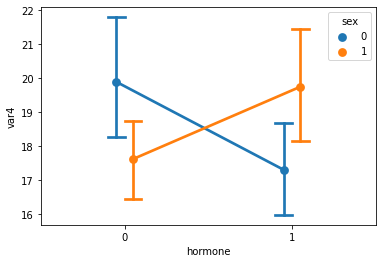

In [77]:
sns.pointplot(x='hormone', y='var4', hue='sex', dodge=0.1, capsize=.1, data=birds)